In [1]:
from sklearn.datasets import load_boston, make_regression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
%matplotlib inline

### Using a predictor as a linear function of another predictor

In [2]:
x = np.linspace(0, 1, 20)
y = 2 * x
X, Y = np.meshgrid(x, y)

In [3]:
Z = 3.14 * X + Y

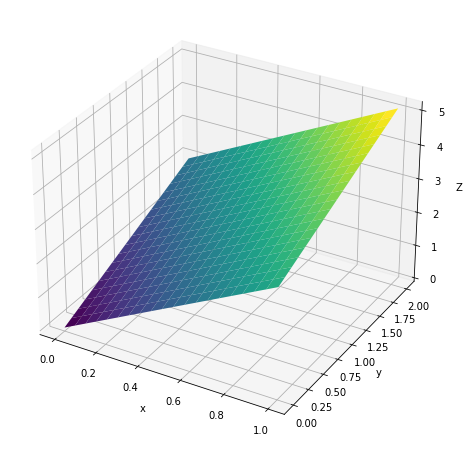

In [4]:
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
_ = ax.set_zlabel('Z')

In [5]:
train = np.c_[x, y]
labels = 3.14 * x + y

In [6]:
train

array([[0.        , 0.        ],
       [0.05263158, 0.10526316],
       [0.10526316, 0.21052632],
       [0.15789474, 0.31578947],
       [0.21052632, 0.42105263],
       [0.26315789, 0.52631579],
       [0.31578947, 0.63157895],
       [0.36842105, 0.73684211],
       [0.42105263, 0.84210526],
       [0.47368421, 0.94736842],
       [0.52631579, 1.05263158],
       [0.57894737, 1.15789474],
       [0.63157895, 1.26315789],
       [0.68421053, 1.36842105],
       [0.73684211, 1.47368421],
       [0.78947368, 1.57894737],
       [0.84210526, 1.68421053],
       [0.89473684, 1.78947368],
       [0.94736842, 1.89473684],
       [1.        , 2.        ]])

In [7]:
y

array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
       0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
       1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
       1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ])

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression().fit(train, labels)

In [10]:
lr.score(train, labels)

1.0

In [11]:
lr.coef_

array([1.028, 2.056])

In [12]:
a = np.linalg.inv(np.dot(train.T, train))
b = np.dot(train.T, labels)
beta_hat = np.dot(a, b)

LinAlgError: Singular matrix

### Question: What went wrong?

In [13]:
np.dot(train.T, train)

array([[ 6.84210526, 13.68421053],
       [13.68421053, 27.36842105]])

The above matrix is a singular matrix. i.e., it's determinant is zero. Scikit is able to still work through it, but the output is not relevant.